<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [13]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [14]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [21]:
import numpy as np

# Ensure 'Age' and 'JobSat' columns exist before processing
if 'Age' in df.columns and 'JobSat' in df.columns:
    # Filter the DataFrame to exclude rows with NaN in Age or JobSat
    df_age_jobsat = df.dropna(subset=['Age', 'JobSat']).copy()

    # Convert age to numeric
    def convert_age_to_numeric(age_str):
        age_mapping = {
            'Under 18 years old': 17,
            '18-24 years old': 21,
            '25-34 years old': 29.5,
            '35-44 years old': 39.5,
            '45-54 years old': 49.5,
            '55-64 years old': 59.5,
            '65 years or older': 70
        }
        return age_mapping.get(age_str, np.nan)

    df_age_jobsat['Age_numeric'] = df_age_jobsat['Age'].apply(convert_age_to_numeric)

    # Convert job satisfaction to numeric (assuming ordinal scale)
    jobsat_mapping = {
        'Very dissatisfied': 1,
        'Slightly dissatisfied': 2,
        'Neither satisfied nor dissatisfied': 3,
        'Slightly satisfied': 4,
        'Very satisfied': 5
    }
    df_age_jobsat['JobSat_numeric'] = df_age_jobsat['JobSat'].map(jobsat_mapping)

    # Remove any rows where the numeric conversion resulted in NaN
    df_age_jobsat = df_age_jobsat.dropna(subset=['Age_numeric', 'JobSat_numeric'])

    if not df_age_jobsat.empty:
        plt.figure(figsize=(12, 8))
        plt.scatter(df_age_jobsat['Age_numeric'], df_age_jobsat['JobSat_numeric'], alpha=0.6)
        plt.title('Age vs. Job Satisfaction')
        plt.xlabel('Age (Numeric)')
        plt.ylabel('Job Satisfaction (1-5 scale)')
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("DataFrame is empty after filtering. Cannot plot.")

else:
    print("Required columns ('Age' or 'JobSat') not found in the DataFrame.")

DataFrame is empty after filtering. Cannot plot.


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


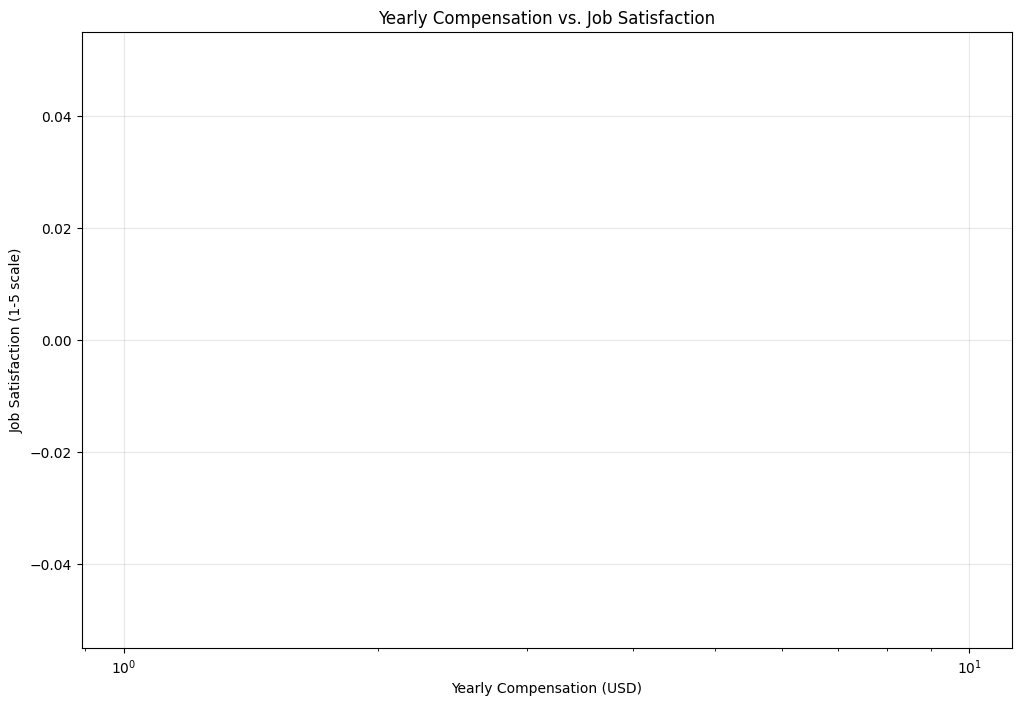

In [17]:
# Filter the DataFrame to exclude rows with NaN or 'NA' in Age or JobSat
df_comp_jobsat = df.dropna(subset=['ConvertedCompYearly', 'JobSat']).copy()

# Convert job satisfaction to numeric (assuming ordinal scale)
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df_comp_jobsat['JobSat_numeric'] = df_comp_jobsat['JobSat'].map(jobsat_mapping)

# Remove any rows where the numeric conversion resulted in NaN
df_comp_jobsat = df_comp_jobsat.dropna(subset=['ConvertedCompYearly', 'JobSat_numeric'])

plt.figure(figsize=(12, 8))
plt.scatter(df_comp_jobsat['ConvertedCompYearly'], df_comp_jobsat['JobSat_numeric'], alpha=0.6)
plt.title('Yearly Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (1-5 scale)')
plt.xscale('log')  # Use log scale for better visualization of compensation
plt.grid(True, alpha=0.3)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [22]:
from scipy import stats

if not df_age_jobsat.empty:
    plt.figure(figsize=(12, 8))
    plt.scatter(df_age_jobsat['Age_numeric'], df_age_jobsat['JobSat_numeric'], alpha=0.6)

    # Calculate regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df_age_jobsat['Age_numeric'], df_age_jobsat['JobSat_numeric'])
    x_values = np.array([df_age_jobsat['Age_numeric'].min(), df_age_jobsat['Age_numeric'].max()])
    y_values = intercept + slope * x_values

    plt.plot(x_values, y_values, color='red', linewidth=2,
             label=f'Trend line: y = {slope:.3f}x + {intercept:.3f}\nR² = {r_value**2:.3f}')

    plt.title('Age vs. Job Satisfaction with Trend Line')
    plt.xlabel('Age (Numeric)')
    plt.ylabel('Job Satisfaction (1-5 scale)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("DataFrame is empty. Cannot plot trend line.")

DataFrame is empty. Cannot plot trend line.


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


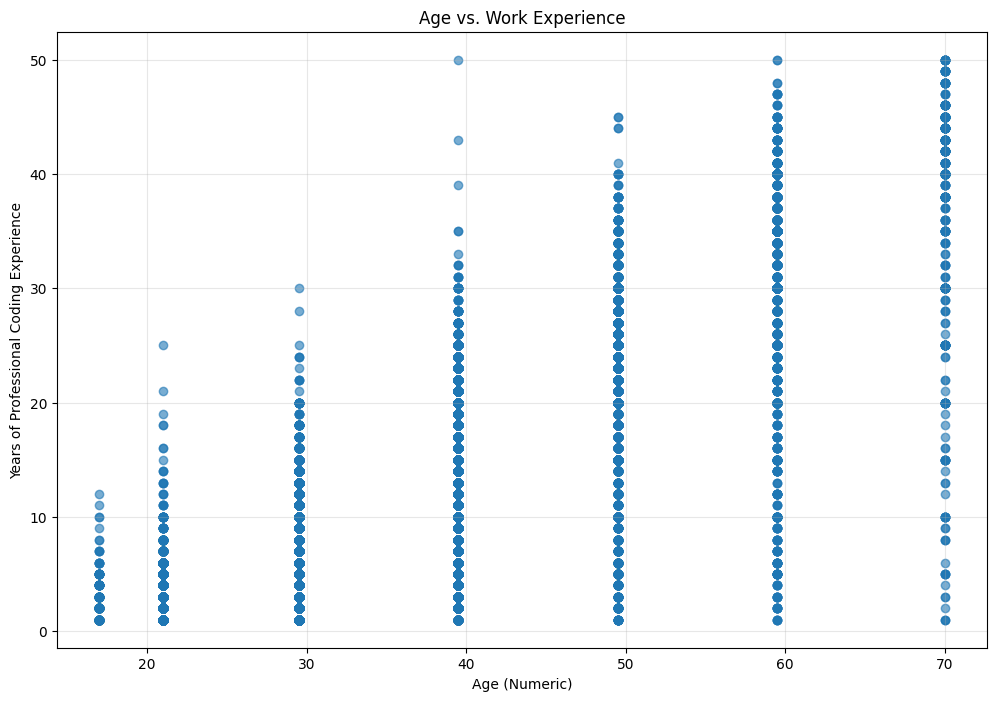

In [23]:
# Filter the DataFrame to exclude rows with NaN or 'NA' in Age or YearsCodePro
df_age_exp = df.dropna(subset=['Age', 'YearsCodePro']).copy()

# Convert age to numeric
df_age_exp['Age_numeric'] = df_age_exp['Age'].apply(convert_age_to_numeric)

# Convert YearsCodePro to numeric, coercing errors
df_age_exp['YearsCodePro'] = pd.to_numeric(df_age_exp['YearsCodePro'], errors='coerce')

# Remove any rows where the numeric conversion resulted in NaN
df_age_exp = df_age_exp.dropna(subset=['Age_numeric', 'YearsCodePro'])

plt.figure(figsize=(12, 8))
plt.scatter(df_age_exp['Age_numeric'], df_age_exp['YearsCodePro'], alpha=0.6)
plt.title('Age vs. Work Experience')
plt.xlabel('Age (Numeric)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True, alpha=0.3)
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


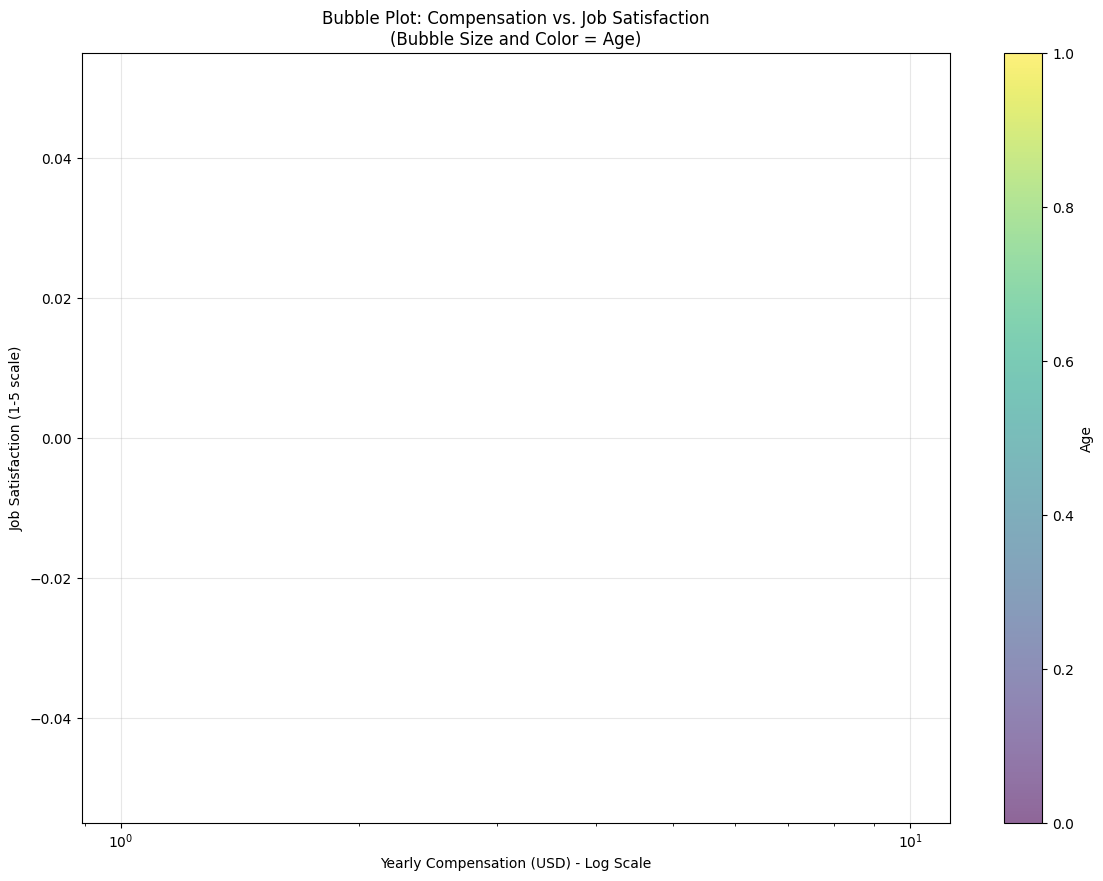

In [26]:
# Filter the DataFrame to exclude rows with NaN or 'NA' in the required columns
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age']).copy()

# Convert categorical variables to numeric
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df_bubble['JobSat_numeric'] = df_bubble['JobSat'].map(jobsat_mapping)

def convert_age_to_numeric(age_str):
    age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 29.5,
        '35-44 years old': 39.5,
        '45-54 years old': 49.5,
        '55-64 years old': 59.5,
        '65 years or older': 70
    }
    return age_mapping.get(age_str, np.nan)

df_bubble['Age_numeric'] = df_bubble['Age'].apply(convert_age_to_numeric)

# Remove any rows where the numeric conversion resulted in NaN
df_bubble = df_bubble.dropna(subset=['ConvertedCompYearly', 'JobSat_numeric', 'Age_numeric'])

plt.figure(figsize=(14, 10))
scatter = plt.scatter(df_bubble['ConvertedCompYearly'],
                     df_bubble['JobSat_numeric'],
                     s=df_bubble['Age_numeric']*2,  # Bubble size based on age
                     alpha=0.6,
                     c=df_bubble['Age_numeric'],
                     cmap='viridis')

plt.colorbar(scatter, label='Age')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction\n(Bubble Size and Color = Age)')
plt.xlabel('Yearly Compensation (USD) - Log Scale')
plt.ylabel('Job Satisfaction (1-5 scale)')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


/tmp/ipython-input-577656252.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_data['JobSat_numeric'] = lang_data['JobSat'].map(jobsat_mapping)
/tmp/ipython-input-577656252.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_data['JobSat_numeric'] = lang_data['JobSat'].map(jobsat_mapping)
/tmp/ipython-input-577656252.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

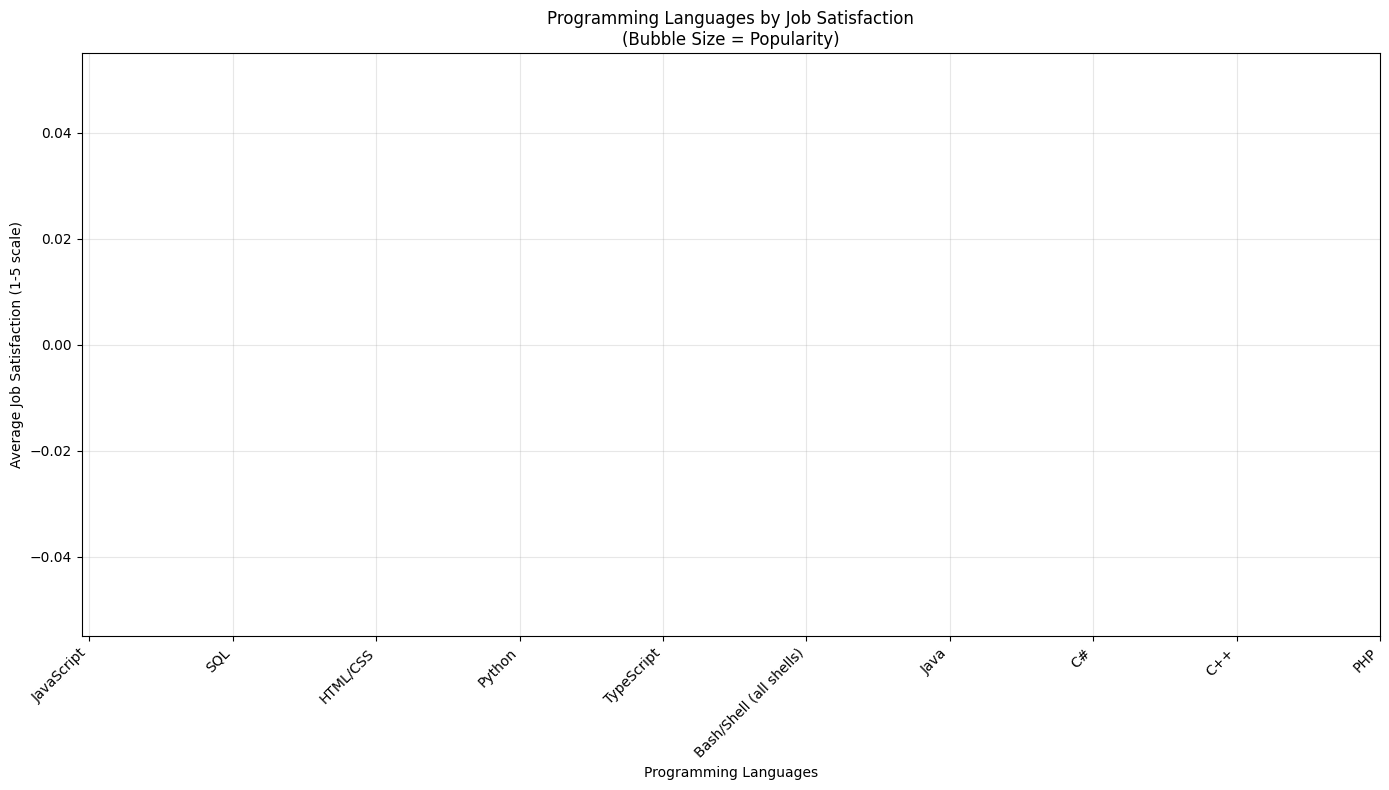

In [29]:
# Filter the DataFrame to exclude rows with NaN or 'NA' in LanguageHaveWorkedWith or JobSat
df_lang_jobsat = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSat']).copy()

# Get top 10 programming languages
all_langs = []
for lang_list in df_lang_jobsat['LanguageHaveWorkedWith']:
    if lang_list:
        langs = lang_list.split(';')
        all_langs.extend(langs)

top_languages = pd.Series(all_langs).value_counts().head(10).index

# Calculate average job satisfaction for each language
lang_satisfaction = {}
for lang in top_languages:
    lang_data = df_lang_jobsat[df_lang_jobsat['LanguageHaveWorkedWith'].str.contains(lang)]
    lang_data['JobSat_numeric'] = lang_data['JobSat'].map(jobsat_mapping)
    avg_satisfaction = lang_data['JobSat_numeric'].mean()
    lang_satisfaction[lang] = avg_satisfaction

# Prepare data for scatter plot
lang_names = list(lang_satisfaction.keys())
satisfaction_scores = list(lang_satisfaction.values())
popularity = [pd.Series(all_langs).value_counts()[lang] for lang in lang_names]

plt.figure(figsize=(14, 8))
scatter = plt.scatter(range(len(lang_names)), satisfaction_scores,
                     s=np.array(popularity)/10, alpha=0.7)  # Size based on popularity

plt.title('Programming Languages by Job Satisfaction\n(Bubble Size = Popularity)')
plt.xlabel('Programming Languages')
plt.ylabel('Average Job Satisfaction (1-5 scale)')
plt.xticks(range(len(lang_names)), lang_names, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipython-input-3614769428.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


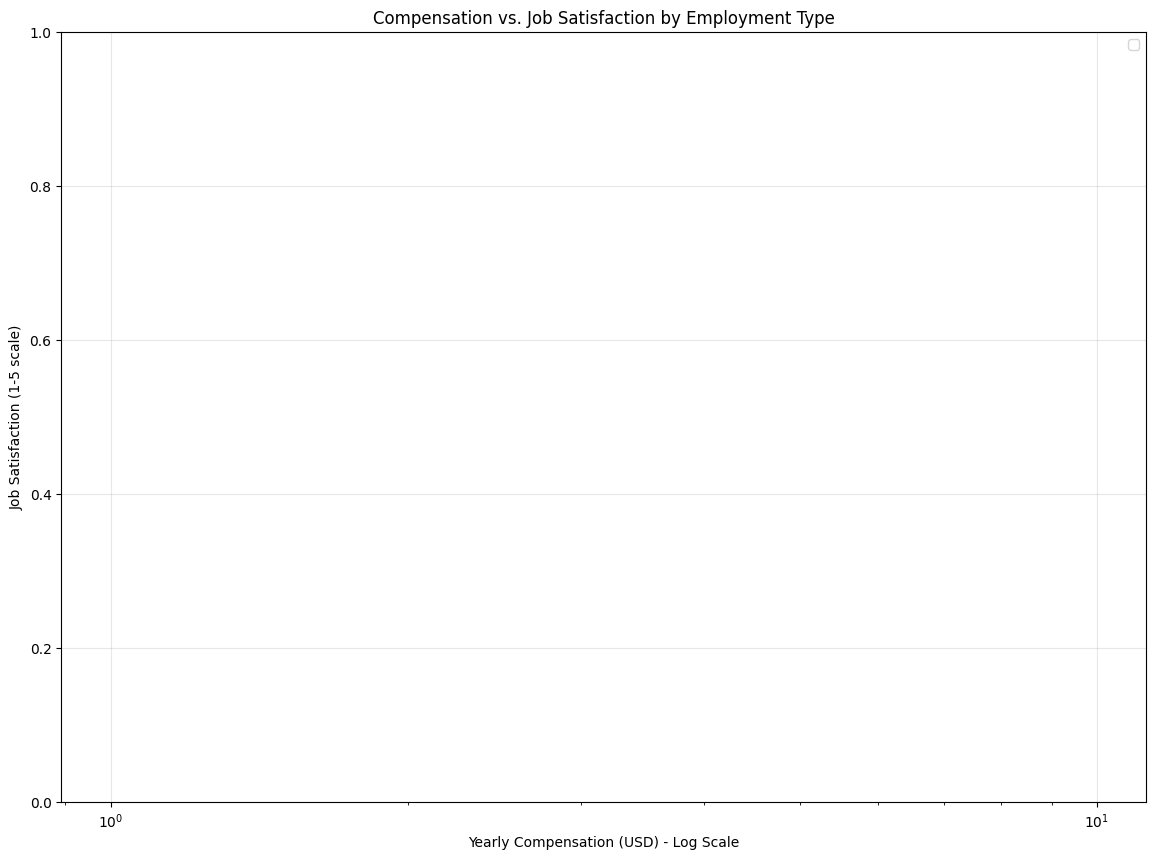

In [30]:
# Filter the DataFrame to exclude rows with NaN or 'NA' in the required columns
df_employment = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Employment']).copy()

# Convert job satisfaction to numeric
jobsat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df_employment['JobSat_numeric'] = df_employment['JobSat'].map(jobsat_mapping)
df_employment = df_employment.dropna(subset=['ConvertedCompYearly', 'JobSat_numeric', 'Employment'])

# Get top employment types
top_employment = df_employment['Employment'].value_counts().head(5).index
df_employment = df_employment[df_employment['Employment'].isin(top_employment)]

plt.figure(figsize=(14, 10))
colors = ['red', 'blue', 'green', 'orange', 'purple']
markers = ['o', 's', '^', 'D', 'v']

for i, employment_type in enumerate(top_employment):
    employment_data = df_employment[df_employment['Employment'] == employment_type]
    plt.scatter(employment_data['ConvertedCompYearly'],
                employment_data['JobSat_numeric'],
                alpha=0.6,
                c=colors[i],
                marker=markers[i],
                label=employment_type,
                s=50)

plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD) - Log Scale')
plt.ylabel('Job Satisfaction (1-5 scale)')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipython-input-261049861.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


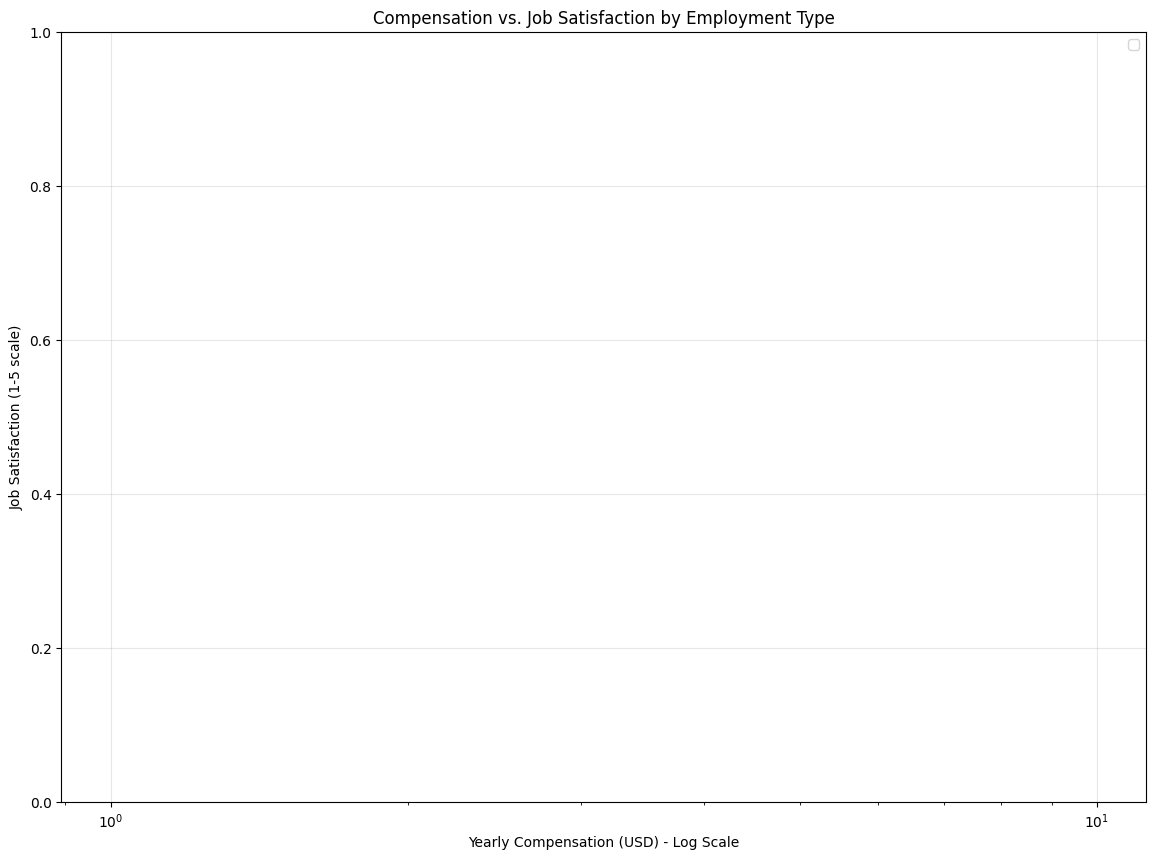

In [32]:
# Convert job satisfaction to numeric
df_employment['JobSat_numeric'] = df_employment['JobSat'].map(jobsat_mapping)
df_employment = df_employment.dropna()

# Get top employment types
top_employment = df_employment['Employment'].value_counts().head(5).index
df_employment = df_employment[df_employment['Employment'].isin(top_employment)]

plt.figure(figsize=(14, 10))
colors = ['red', 'blue', 'green', 'orange', 'purple']
markers = ['o', 's', '^', 'D', 'v']

for i, employment_type in enumerate(top_employment):
    employment_data = df_employment[df_employment['Employment'] == employment_type]
    plt.scatter(employment_data['ConvertedCompYearly'],
                employment_data['JobSat_numeric'],
                alpha=0.6,
                c=colors[i],
                marker=markers[i],
                label=employment_type,
                s=50)

plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD) - Log Scale')
plt.ylabel('Job Satisfaction (1-5 scale)')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
